<a href="https://colab.research.google.com/github/b4lbs/alura_ML_classificacao_por_tras_dos_panos/blob/main/ML_Classifica%C3%A7%C3%A3o_Por_Tr%C3%A1s_Dos_Panos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
dados = pd.read_csv('/content/Customer-Churn.csv')

In [6]:
dados.shape

(7043, 18)

In [7]:
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


In [8]:
#modificando as variáveis categórias para numéricas de forma manual
traducao_dic = {
    'Sim' : 1,
    'Nao' : 0
}

dados_modificados = dados[['Conjuge','Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dic)
dados_modificados.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [9]:
#mudando por meio do get_dummies
dummie_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'], axis=1))
dummie_dados.head()

,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,0,1,29.85,0,1,0,1,0,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,34,56.95,1,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,0,2,53.85,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,45,42.30,0,1,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
4,0,2,70.70,1,0,0,0,1,0,1,...,1,0,0,0,1,0,0,1,0,0


In [10]:
#concatenando os dados transformados
dados_final = pd.concat([dados_modificados, dummie_dados], axis = 1)
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,...,1,0,0,0,1,0,0,1,0,0


In [11]:
#visualizando todas as colunas do DataFrame
pd.set_option('display.max_columns', 39)
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


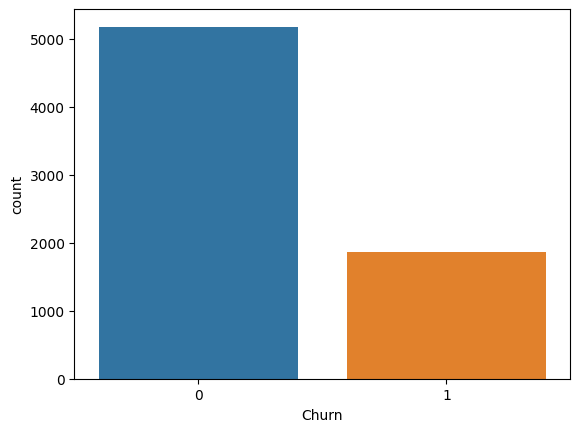

In [12]:
#observando o desbalanceamento dos dados
import seaborn as sns
%matplotlib inline

ax = sns.countplot(x='Churn', data=dados_final)

In [13]:
# separando dados
X = dados_final.drop('Churn', axis=1)
y = dados_final['Churn']

In [14]:
#técnica de oversampling SMOTE
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=42)
X, y = smt.fit_resample(X,y)

In [15]:
dados_final = pd.concat([X,y], axis=1)
dados_final.head(2)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0


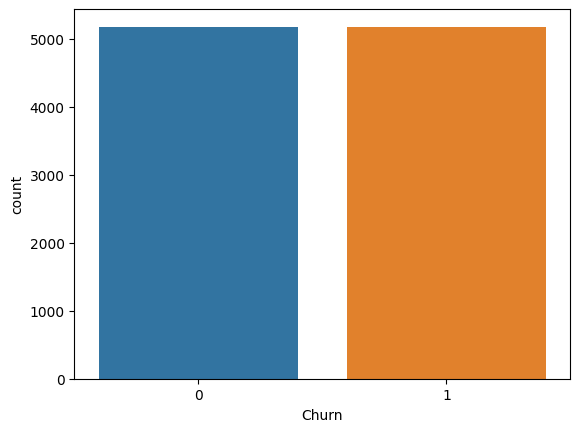

In [16]:
ax = sns.countplot(x='Churn', data = dados_final)

In [17]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

In [18]:
X  = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [19]:
#escalonando os dados
from sklearn.preprocessing import StandardScaler

In [20]:
norm = StandardScaler()

X_normalizado = norm.fit_transform(X)
X_normalizado

array([[ 1.26387878, -0.53144987, -3.04231798, ...,  1.29673579,
        -0.47363024, -0.43977642],
       [-0.79121512, -0.53144987,  0.32869674, ..., -0.77116712,
         2.11135168, -0.43977642],
       [-0.79121512, -0.53144987,  0.32869674, ..., -0.77116712,
         2.11135168, -0.43977642],
       ...,
       [-0.79121512, -0.53144987,  0.32869674, ...,  1.29673579,
        -0.47363024, -0.43977642],
       [-0.79121512, -0.53144987,  0.32869674, ..., -0.77116712,
        -0.47363024, -0.43977642],
       [-0.79121512, -0.53144987,  0.32869674, ..., -0.77116712,
        -0.47363024, -0.43977642]])

In [21]:
X_normalizado[0]

array([ 1.26387878, -0.53144987, -3.04231798,  0.80305014, -0.40900744,
       -1.11470659, -1.32844805, -0.88725382,  3.21273451, -0.84017959,
        1.51441199, -1.04974775, -0.44383835,  0.86964343, -0.44383835,
       -0.52081961, -0.95834643, -0.44383835,  1.57985631,  1.04306   ,
       -0.44383835, -0.63971344,  0.87084369, -0.44383835, -0.52696167,
        1.20167573, -0.44383835, -0.78927885,  1.20215622, -0.44383835,
       -0.78589647, -0.446643  ,  0.74085756, -0.42386621, -0.42893087,
        1.29673579, -0.47363024, -0.43977642])

In [22]:
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns = X.columns))
Xmaria_normalizado

array([[-0.79121512, -0.53144987,  0.32869674,  0.80305014, -0.40900744,
        -1.15639549, -0.9791211 ,  1.1270732 , -0.31126133, -0.84017959,
        -0.6603223 ,  0.9526098 , -0.44383835,  0.86964343, -0.44383835,
        -0.52081961, -0.95834643, -0.44383835,  1.57985631,  1.04306   ,
         2.25307254, -0.63971344, -1.1483117 ,  2.25307254, -0.52696167,
         1.20167573, -0.44383835, -0.78927885, -0.83183864, -0.44383835,
         1.27243223, -0.446643  , -1.34978712,  2.35923501, -0.42893087,
        -0.77116712, -0.47363024,  2.27388272]])

In [23]:
#visualizando o calculo da distância euclidiana
import numpy as np
a = Xmaria_normalizado
b = X_normalizado[0]

In [24]:
#1 - começamos subtraindo
a - b

array([[-2.0550939 ,  0.        ,  3.37101472,  0.        ,  0.        ,
        -0.0416889 ,  0.34932695,  2.01432702, -3.52399583,  0.        ,
        -2.17473428,  2.00235756,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         2.69691089,  0.        , -2.01915539,  2.69691089,  0.        ,
         0.        ,  0.        ,  0.        , -2.03399486,  0.        ,
         2.0583287 ,  0.        , -2.09064469,  2.78310122,  0.        ,
        -2.06790291,  0.        ,  2.71365914]])

In [25]:
#2 - depois realizamos a exponenciação
np.square(a-b)

array([[4.22341093e+00, 0.00000000e+00, 1.13637403e+01, 0.00000000e+00,
        0.00000000e+00, 1.73796400e-03, 1.22029319e-01, 4.05751333e+00,
        1.24185466e+01, 0.00000000e+00, 4.72946920e+00, 4.00943578e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.27332836e+00, 0.00000000e+00, 4.07698850e+00, 7.27332836e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.13713511e+00, 0.00000000e+00, 4.23671704e+00, 0.00000000e+00,
        4.37079521e+00, 7.74565241e+00, 0.00000000e+00, 4.27622243e+00,
        0.00000000e+00, 7.36394593e+00]])

In [26]:
#3 - a soma
np.sum(np.square(a-b))

91.67999676829339

In [27]:
#4 - entçao tiramos a raiz e temos nossa distância
np.sqrt(91.67999676829339)

9.574967194110558

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_normalizado, y, test_size=0.3, random_state=42)

In [29]:
#TESTANDO O ALGORITMO KNN (método baseada na proximidade)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(metric='euclidean')
knn.fit(X_train,y_train)
predito_knn = knn.predict(X_test)

In [30]:
predito_knn

array([1, 0, 0, ..., 1, 1, 0])

In [31]:
#desafio knn mao na massa (minha solução)
a = Xmaria_normalizado
for i in range(10):
  b = X_normalizado[i]
  pre = np.sum(np.square(a-b))
  print(f'A distância de maria até o {i+1} cliente é de {np.sqrt(pre)}')


A distância de maria até o 1 cliente é de 9.574967194110558
A distância de maria até o 2 cliente é de 9.17270411883375
A distância de maria até o 3 cliente é de 8.495727363831861
A distância de maria até o 4 cliente é de 10.044904596479766
A distância de maria até o 5 cliente é de 7.798143038489639
A distância de maria até o 6 cliente é de 9.006293851132126
A distância de maria até o 7 cliente é de 8.95716156713424
A distância de maria até o 8 cliente é de 10.638268954080605
A distância de maria até o 9 cliente é de 9.44274954662972
A distância de maria até o 10 cliente é de 7.924085438717369


In [32]:
#solução do curso
def calcula_distancia(dados_clientes, dados_maria, numero_clientes):
  distancias = []

  for i in range(numero_clientes):
    dist1 = dados_maria - dados_clientes[i]
    soma_quadrado = np.sum(np.square(dist1))
    distancias.append(np.sqrt(soma_quadrado))

  return distancias

In [33]:
calcula_distancia(X_normalizado, Xmaria_normalizado, 10)

[9.574967194110558,
 9.17270411883375,
 8.495727363831861,
 10.044904596479766,
 7.798143038489639,
 9.006293851132126,
 8.95716156713424,
 10.638268954080605,
 9.44274954662972,
 7.924085438717369]

In [34]:
X_train

array([[-0.79121512, -0.53144987,  0.32869674, ..., -0.77116712,
         2.11135168, -0.43977642],
       [-0.79121512, -0.53144987,  0.32869674, ...,  1.29673579,
        -0.47363024, -0.43977642],
       [ 1.26387878, -0.53144987,  0.32869674, ..., -0.77116712,
        -0.47363024,  2.27388272],
       ...,
       [-0.79121512, -0.53144987,  0.32869674, ...,  1.29673579,
        -0.47363024, -0.43977642],
       [-0.79121512, -0.53144987,  0.32869674, ..., -0.77116712,
        -0.47363024, -0.43977642],
       [-0.79121512, -0.53144987,  0.32869674, ..., -0.77116712,
         2.11135168, -0.43977642]])

In [35]:
y_train

8969    1
7136    1
3668    0
1701    1
3143    0
       ..
5734    0
5191    0
5390    1
860     0
7270    1
Name: Churn, Length: 7243, dtype: int64

In [36]:
#binarizando os valores com base na mediana, para poder utilizar o algoritmo (existe um erro na vídeo aula)
X_train_binarized = np.where(X_train > np.median(X_train), 1, 0)

In [37]:
#TESTANDO O ALGORITMO BERNOULLI NAIVE BAYES (método probabilistico)
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train_binarized, y_train)
predito_bnb = bnb.predict(X_test)

In [38]:
predito_bnb

array([1, 0, 1, ..., 1, 1, 1])

In [39]:
#TESTANDO O ALGORITMO DE ÁRVORE DE DECISÃO
from sklearn.tree import DecisionTreeClassifier

#instanciando o modelo
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)

#treinando o modelo
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [40]:
#verificando
dtc.feature_importances_

array([0.01917806, 0.01766232, 0.00512261, 0.02225208, 0.01987375,
       0.16357362, 0.21632581, 0.01099531, 0.00435942, 0.01262764,
       0.00057325, 0.03050695, 0.00385302, 0.01602833, 0.        ,
       0.01853509, 0.01236922, 0.        , 0.01001941, 0.00776944,
       0.        , 0.00826881, 0.01030322, 0.000555  , 0.01419821,
       0.00813423, 0.        , 0.00704246, 0.0070827 , 0.        ,
       0.01465207, 0.03666108, 0.15503416, 0.07311628, 0.01776751,
       0.01855253, 0.02355999, 0.0134464 ])

In [41]:
predito_ArvoreDecisao = dtc.predict(X_test)

In [42]:
predito_ArvoreDecisao

array([1, 0, 0, ..., 0, 1, 1])

In [46]:
#Modelo KNN
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
confusion_matrix_knn = confusion_matrix(y_test, predito_knn)
print(confusion_matrix_knn)

[[1256  318]
 [ 241 1290]]


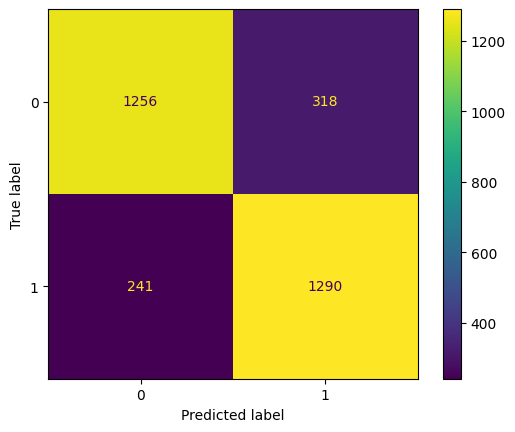

In [56]:
import matplotlib.pyplot as plt

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_knn, display_labels = [0, 1])
cm_display.plot()
plt.show()

In [51]:
#Modelo Bernoulli Naive Bayes
confusion_matrix_bnb = confusion_matrix(y_test, predito_bnb)
print(confusion_matrix_bnb)

[[1067  507]
 [ 219 1312]]


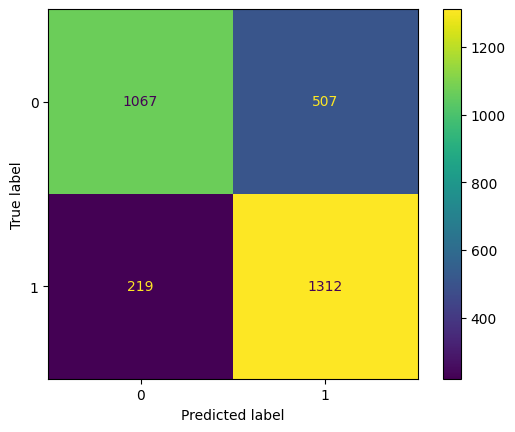

In [57]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_bnb, display_labels = [0, 1])
cm_display.plot()
plt.show()

In [53]:
#Modelo Árvore de Decisão
confusion_matrix_ArvoreDecisao = confusion_matrix(y_test, predito_ArvoreDecisao)
print(confusion_matrix_ArvoreDecisao)

[[1240  334]
 [ 283 1248]]


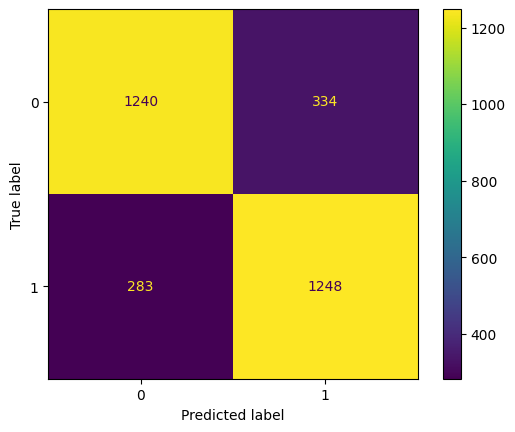

In [58]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_ArvoreDecisao, display_labels = [0, 1])
cm_display.plot()
plt.show()

In [60]:
#Observando a acurácia dos modelos ACC = (TP + TN)/(TP + FP + TN + FN)
from sklearn.metrics import accuracy_score

#modelo KNN
print(accuracy_score(y_test, predito_knn)*100)

81.99677938808374


In [63]:
#modelo Bernoulli Naive Bayes
print(accuracy_score(y_test, predito_bnb)*100)

76.61835748792271


In [65]:
#modelo árvore de decisão
print(accuracy_score(y_test, predito_ArvoreDecisao)*100)

80.12882447665056


In [67]:
#Observando a precisão dos modelos PS = TP/(TP + FP)
from sklearn.metrics import precision_score

#modelo KNN
print(precision_score(y_test, predito_knn)*100)

80.22388059701493


In [68]:
#modelo Bernoulli Naive Bayes
print(precision_score(y_test, predito_bnb)*100)

72.12754260582737


In [69]:
#modelo árvore de decisão
print(precision_score(y_test, predito_ArvoreDecisao)*100)

78.88748419721871


In [71]:
#Observando o recall dos modelos RC = TP/(TP + FN)
from sklearn.metrics import recall_score

#modelo KNN
print(recall_score(y_test, predito_knn)*100)

84.25865447419987


In [72]:
#modelo Bernoulli Naive Bayes
print(recall_score(y_test, predito_bnb)*100)

85.69562377531025


In [73]:
#modelo Ávore de decisão
print(recall_score(y_test, predito_ArvoreDecisao)*100)

81.51534944480731


In [74]:
#Escolhendo o melhor modelo com base na PRECISÃO

print(f'A precisão do modelo KNN foi: {precision_score(y_test, predito_knn)*100:.2f}%')
print(f'A precisão do modelo Bernoulli Naive Bayes foi: {precision_score(y_test, predito_bnb)*100:.2f}%')
print(f'A precisão do modelo Árvore de Decisão foi: {precision_score(y_test, predito_ArvoreDecisao)*100:.2f}%')

A precisão do modelo KNN foi: 80.22%
A precisão do modelo Bernoulli Naive Bayes foi: 72.13%
A precisão do modelo Árvore de Decisão foi: 78.89%


Tendo as informações a cima, o melhor modelo para o problema apresentado no curso é o KNN (K - NEAREST NEIGHBORS). Para escolher qual métrica usar para avaliar os modelos, é necessário entender o problema e ver qual métrica se encaixa com o objetivo final.
